In [1]:
import tensorflow as tf
from VisionTransformer import ViT
import matplotlib
import matplotlib.pyplot as plt

2024-06-14 23:48:10.848946: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 23:48:10.849027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 23:48:10.849057: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 23:48:10.858814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
inp_shape = (32,32,3)
num_layers = 8
patch_size = 6
img_size = 72
num_patches = (img_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_mlp_input_units = projection_dim * 2
transformer_mlp_output_units = projection_dim
mlp_input_units = 2048
mlp_output_units = 1024
num_classes = 10
BATCH_SIZE = 64

vision_transformer = ViT(img_size, num_layers, patch_size, num_patches, projection_dim, num_heads, transformer_mlp_input_units, transformer_mlp_output_units, mlp_input_units, mlp_output_units, num_classes)

vision_transformer.compile(
    optimizer=tf.keras.optimizers.AdamW(weight_decay = 0.0001, learning_rate = 0.001),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

2024-06-14 23:48:13.290426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-14 23:48:13.321307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-14 23:48:13.321358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-14 23:48:13.324456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-14 23:48:13.324512: I tensorflow/compile

In [4]:
history = vision_transformer.fit(
    x = x_train,
    y = y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10


2024-06-14 23:48:13.795741: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-06-14 23:48:13.881317: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-06-14 23:48:25.538070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-06-14 23:48:26.834284: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdade5212b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-14 23:48:26.834327: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-06-14 23:48:26.868915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-14 23:48:27.148449: I ./tensorflow/compiler/jit

625/625 [==============================] - 98s 120ms/step - loss: 9.9137 - accuracy: 0.2802 - val_loss: 1.8153 - val_accuracy: 0.3547
Epoch 2/10
625/625 [==============================] - 81s 129ms/step - loss: 1.8815 - accuracy: 0.3302 - val_loss: 1.8410 - val_accuracy: 0.3537
Epoch 3/10
625/625 [==============================] - 79s 126ms/step - loss: 1.9034 - accuracy: 0.3232 - val_loss: 1.9189 - val_accuracy: 0.3307
Epoch 4/10
625/625 [==============================] - 71s 114ms/step - loss: 1.8973 - accuracy: 0.3377 - val_loss: 1.6732 - val_accuracy: 0.3948
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 1.8256 - accuracy: 0.3606 - val_loss: 1.7356 - val_accuracy: 0.3858
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 1.6550 - accuracy: 0.4110 - val_loss: 1.5490 - val_accuracy: 0.4411
Epoch 7/10
625/625 [==============================] - 71s 114ms/step - loss: 1.5274 - accuracy: 0.4532 - val_loss: 1.3930 - val_accuracy: 0.5

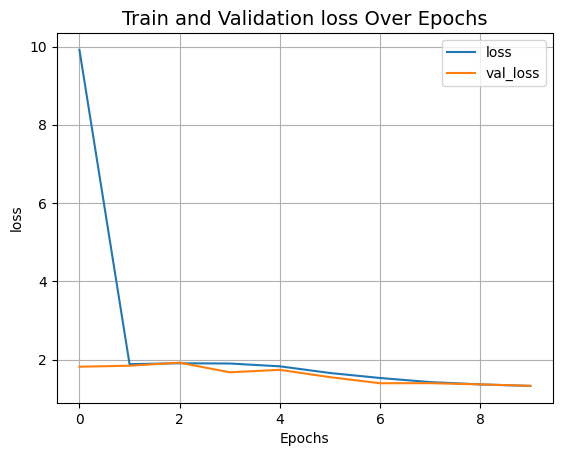

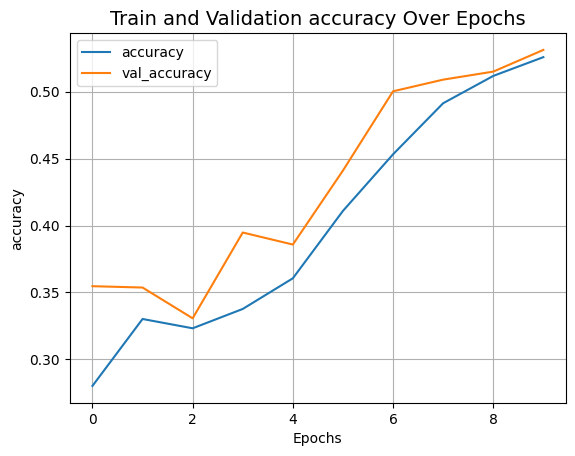

In [5]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("accuracy")

1/1 [==============================] - 0s 127ms/step


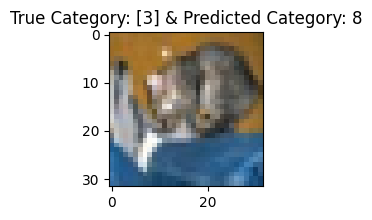

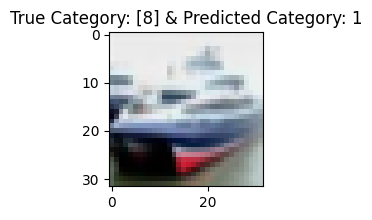

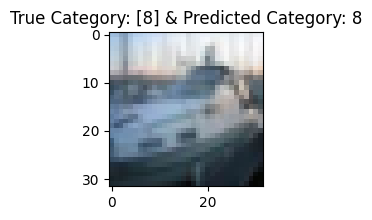

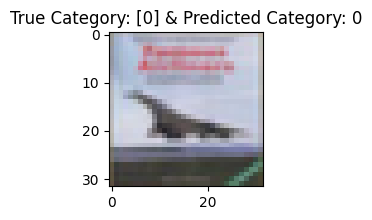

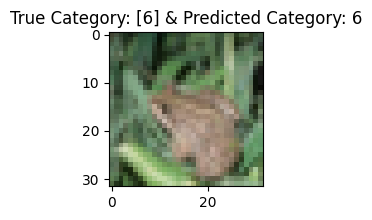

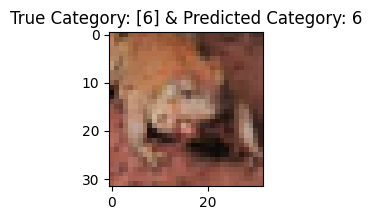

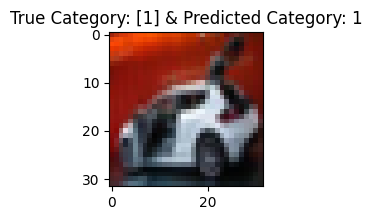

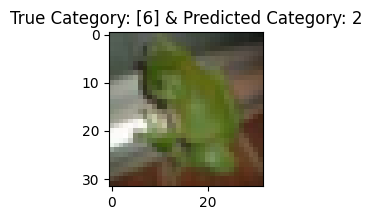

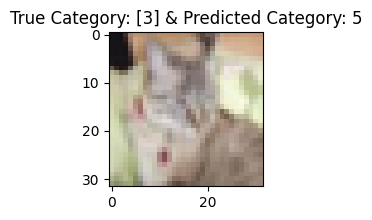

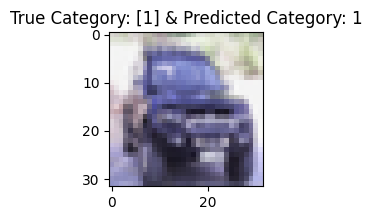

In [17]:
def plot_image( img, category, pred ):
    plt.figure( figsize = ( 2 ,2 ) )
    plt.imshow( img )  
    plt.title("True Category: {} & Predicted Category: {}".format(category, pred))         
    plt.show()

true = y_test[:10]
pred = tf.argmax(vision_transformer.predict(x_test[:10,:,:,:]), axis = -1)
for i in range(10):
    plot_image(x_test[i,:,:,:], true[i], pred[i])
